### Ridge & Lasso Regression - Boston Housing Prices

- By Lily Elizabeth John

In [74]:
#import libraries and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import sklearn.cross_validation
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from sklearn.linear_model import Ridge
boston = load_boston() #Dataset
fields=pd.read_excel('fielddescr.xlsx')

In [2]:
boston.keys()

dict_keys(['DESCR', 'data', 'feature_names', 'target'])

In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.target.shape

(506,)

In [7]:
boston_df=pd.DataFrame(boston.data)
boston_df.columns=boston.feature_names
boston_df['MEDV']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### EDA and Visualization

In [8]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Histograms

In [9]:
field_dict={"CRIM":"per capita crime rate by town",
            "ZN":"proportion of residential land zoned for lots over 25,000 sq.ft.",
            "INDUS":"proportion of non-retail business acres per town",
            "CHAS":"Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)",
            "NOX":"nitric oxides concentration (parts per 10 million)",
            "RM":"average number of rooms per dwelling",
            "AGE":"proportion of owner-occupied units built prior to 1940",
            "DIS":"weighted distances to five Boston employment centres",
            "RAD":"index of accessibility to radial highways",
            "TAX":"full-value property-tax rate per $10,000",
            "PTRATIO":"pupil-teacher ratio by town",
            "B":"1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town",
            "LSTAT":"% lower status of the population",
            "MEDV":"Median value of owner-occupied homes in $1000's"}

In [10]:
def print_histograms(data,idesc):
    plt.hist(data)
    plt.title(idesc)
    plt.xlabel(idesc)
    plt.ylabel("Frequency")
    plt.show()

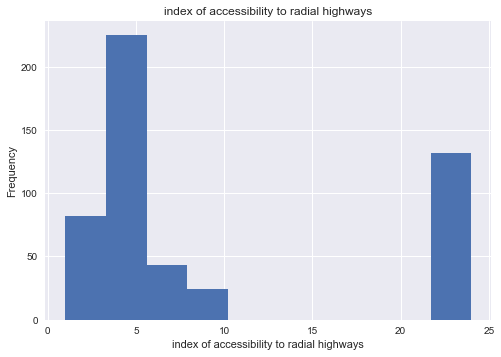

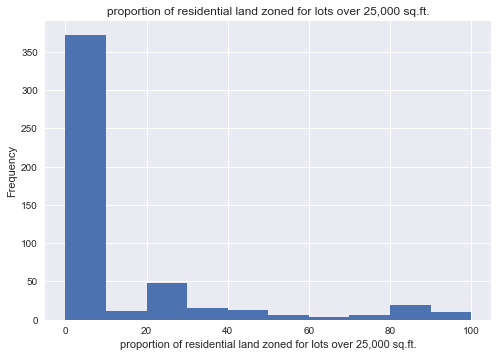

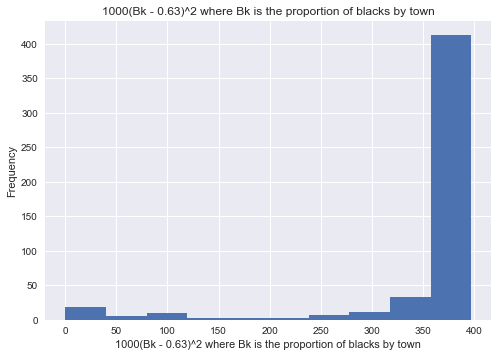

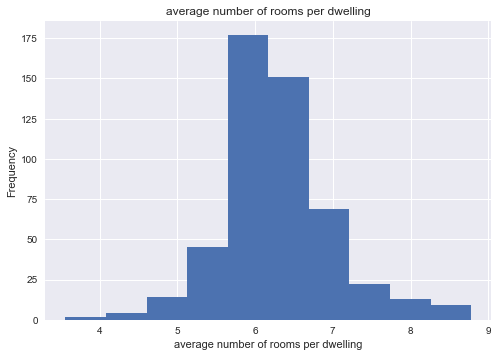

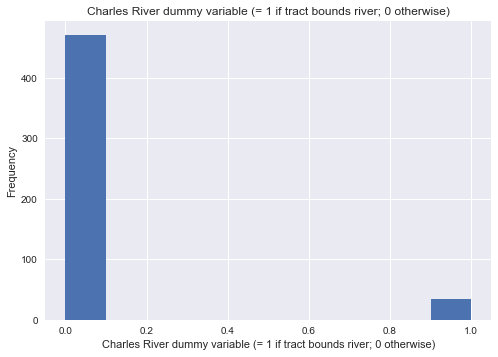

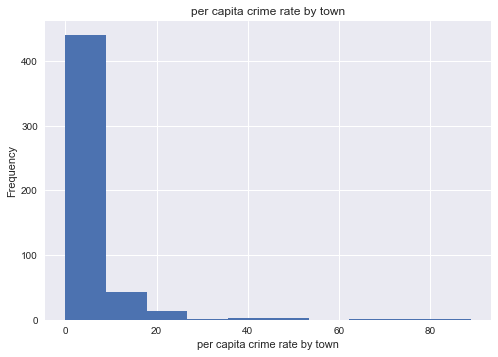

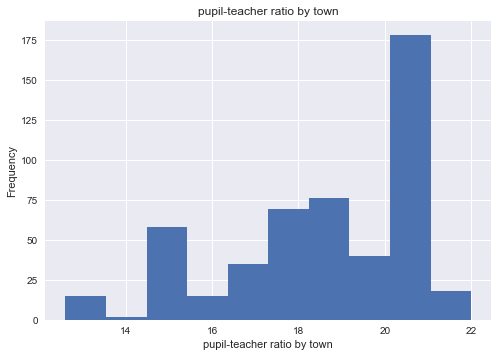

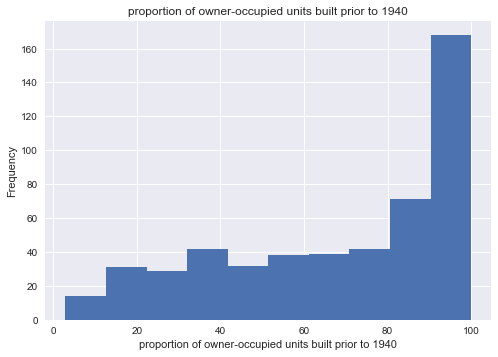

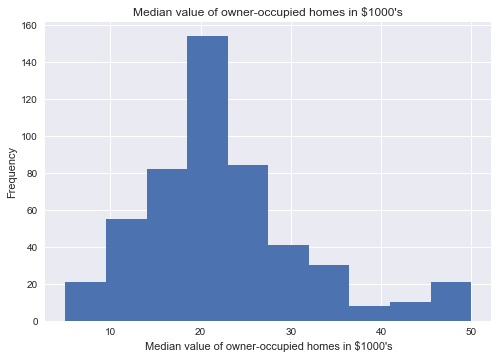

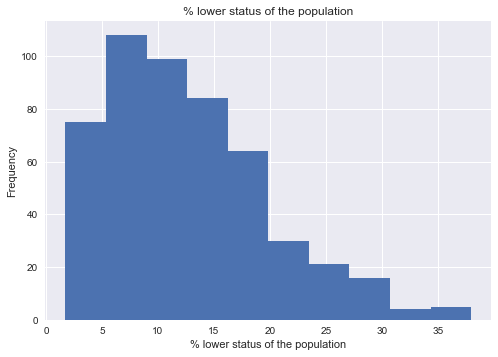

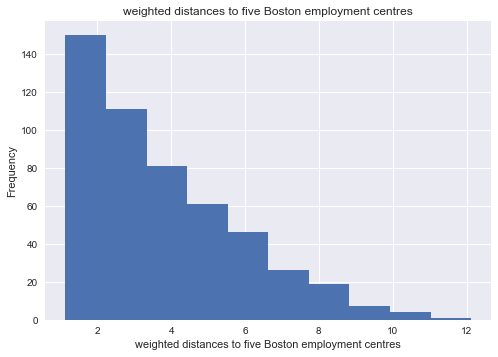

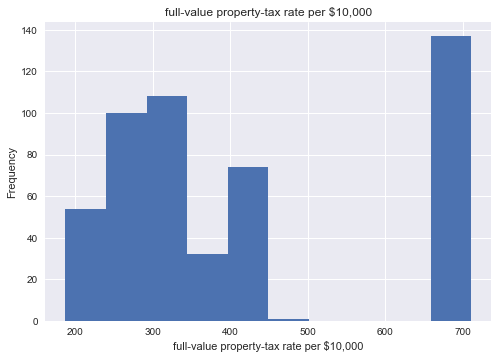

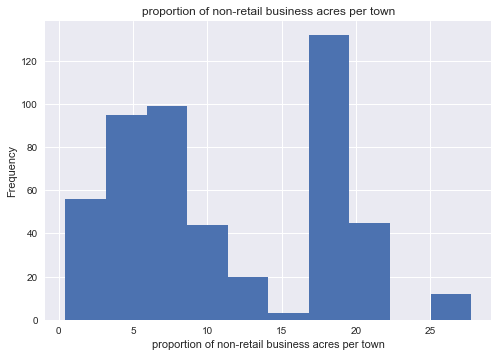

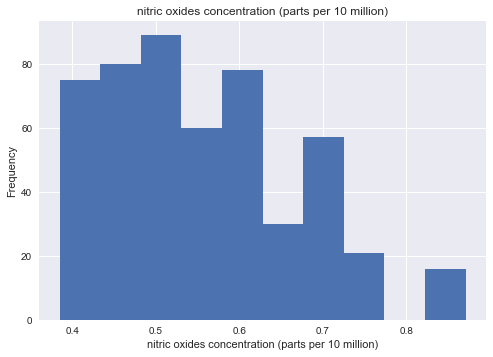

In [11]:
for i, j in field_dict.items():
    print_histograms(boston_df[i],j)

#### Scatter Plots

In [38]:
def print_scatterplots(x,y,idesc):
    plt.scatter(x,y)
    plt.title(idesc)
    plt.xlabel(idesc)
    plt.ylabel("Price")
    plt.show()

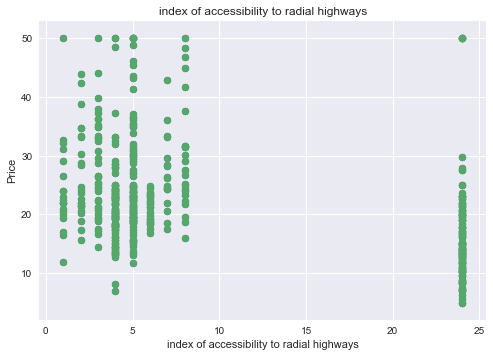

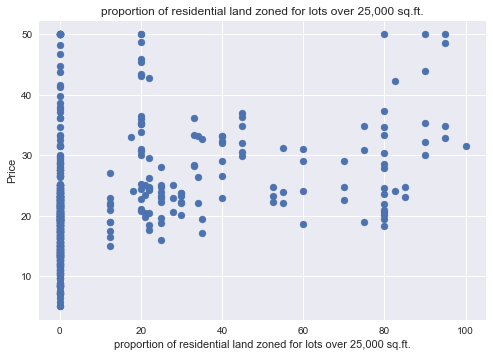

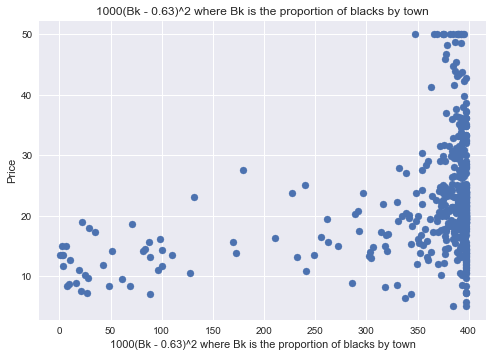

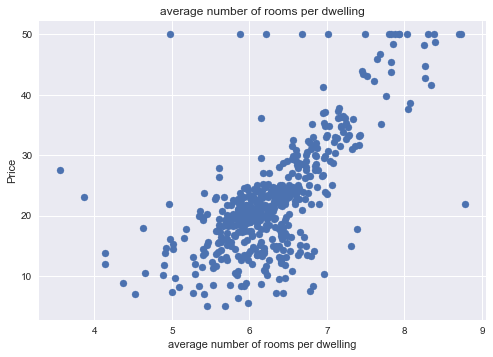

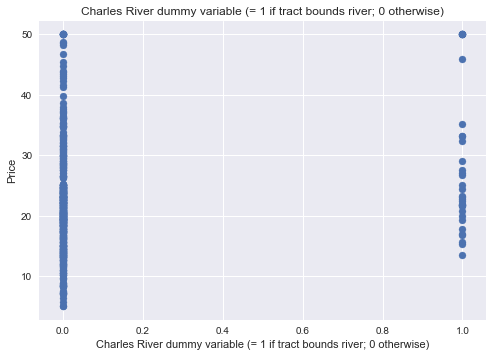

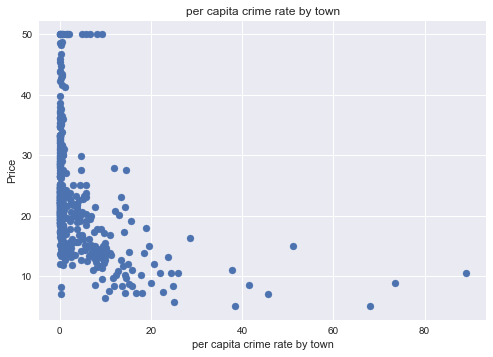

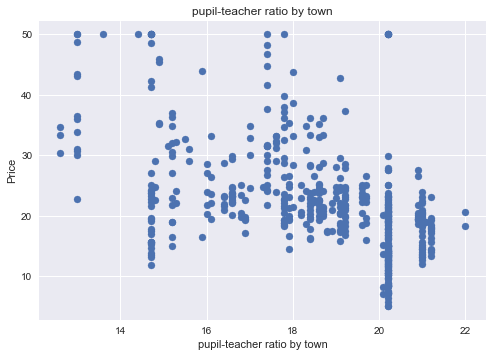

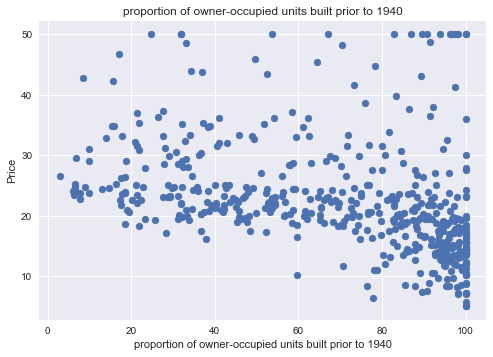

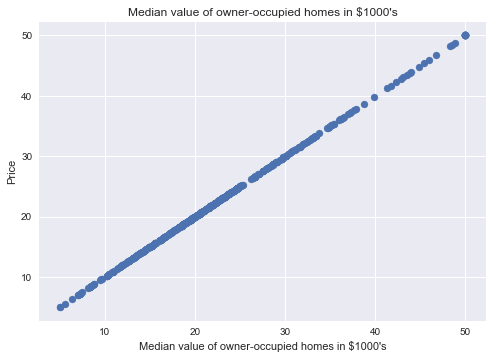

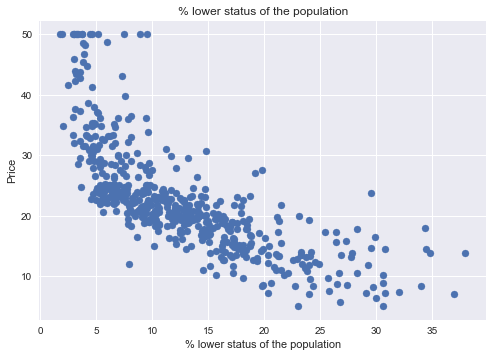

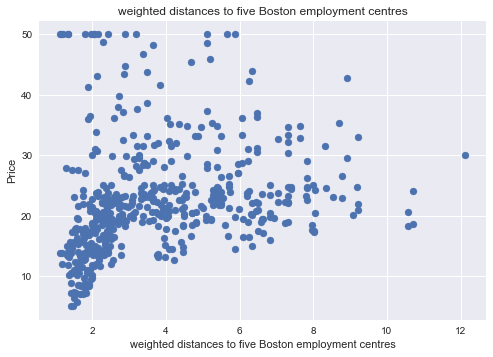

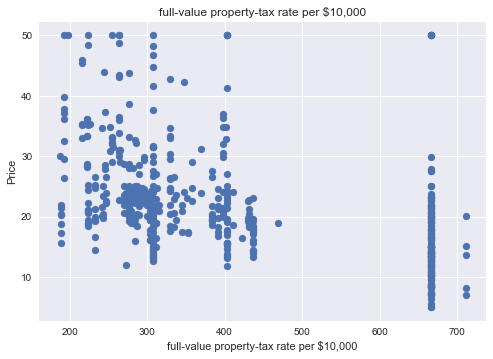

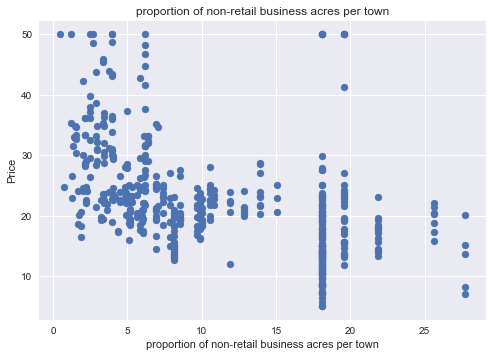

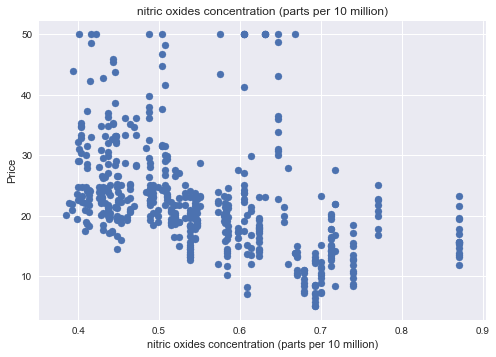

In [39]:
for i,j in field_dict.items():
    print_scatterplots(boston_df[i],boston_df['MEDV'],j)

#### Regression Plots

In [40]:
def print_regplots(x,y,idesc):
    sns.regplot(x,y,fit_reg=True)
    plt.title(idesc)
    plt.xlabel(idesc)
    plt.ylabel("Price")
    plt.show()

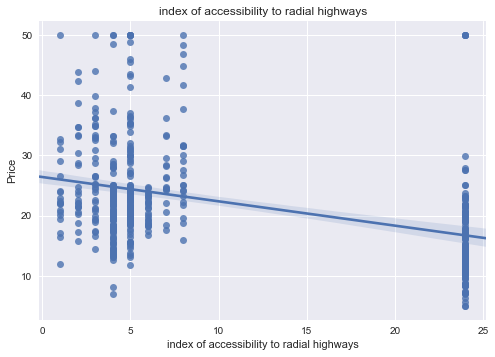

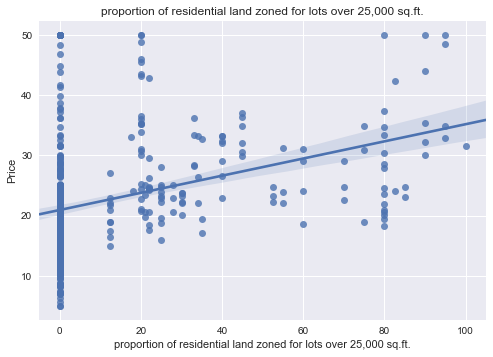

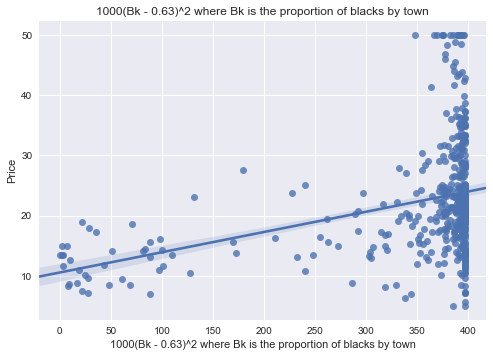

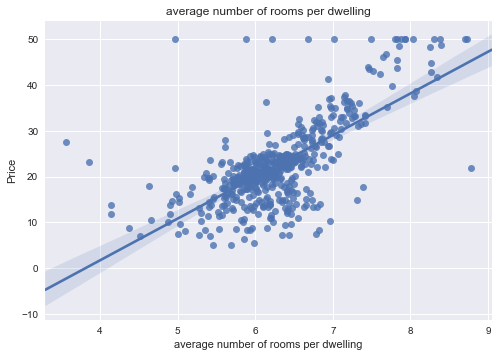

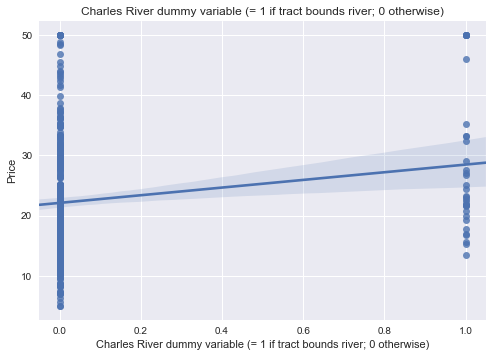

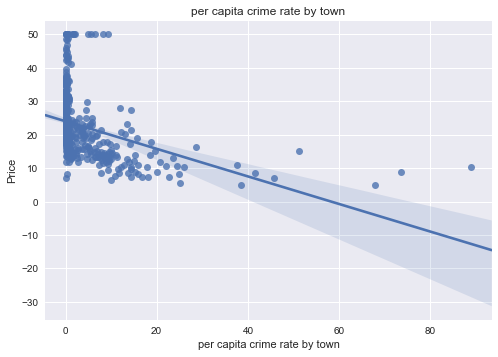

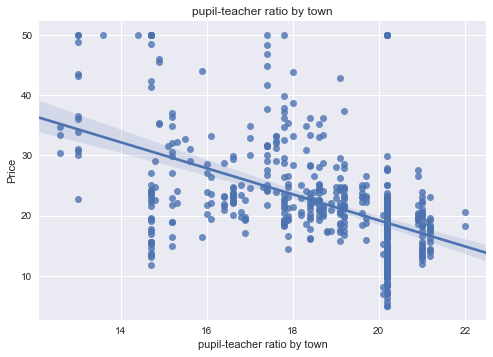

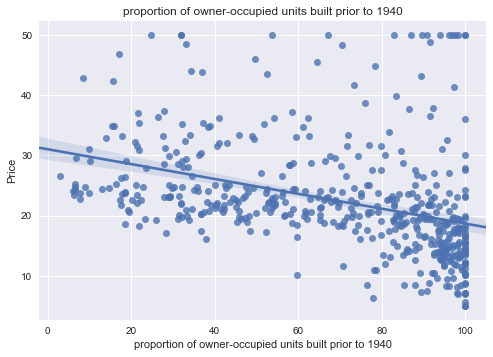

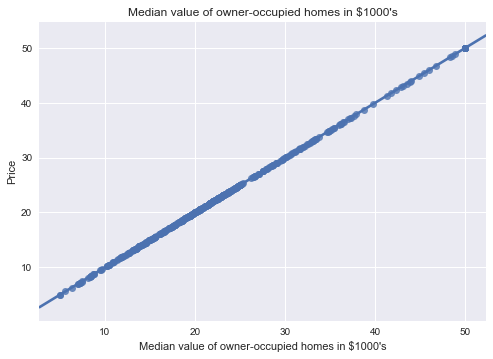

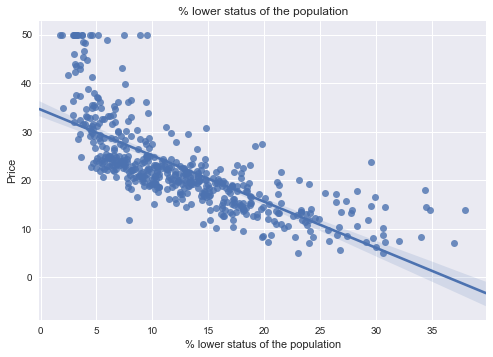

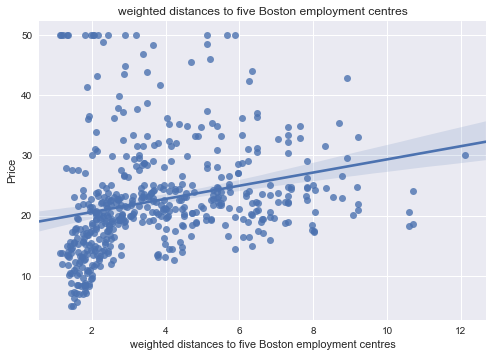

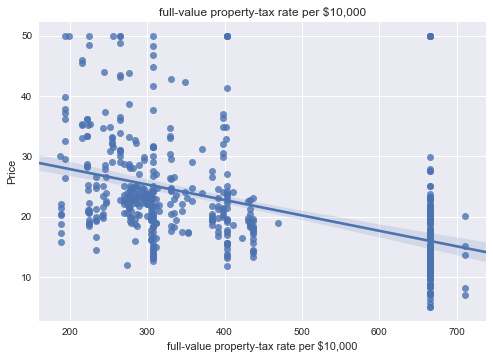

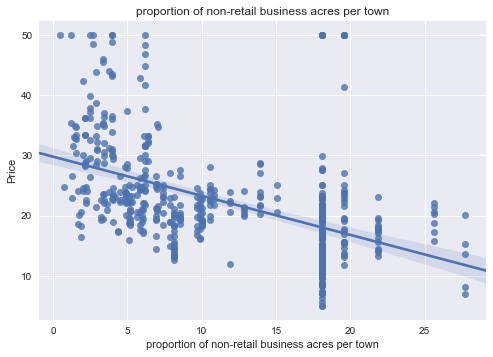

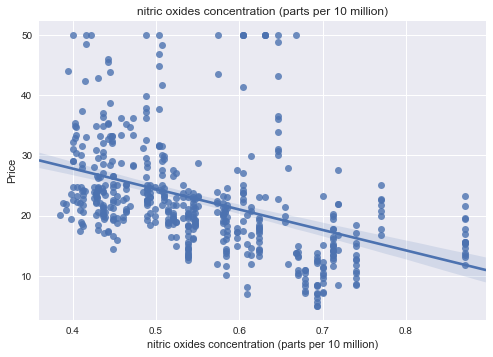

In [41]:
for i,j in field_dict.items():
    print_regplots(boston_df[i],boston_df['MEDV'],j)

#### Q-Q Plots

#### Correlation Matrix

In [42]:
corr=boston_df.corr()

In [43]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


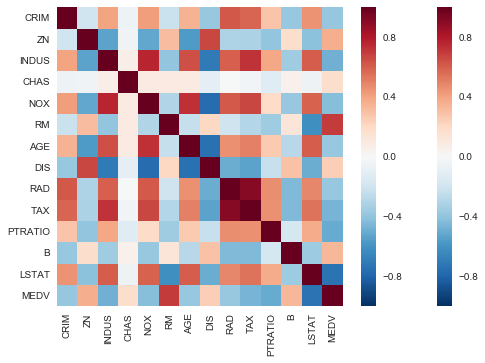

In [45]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

#### Split Train and Test Datasets

In [58]:
X=boston_df.drop('MEDV',axis=1)

In [59]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, boston_df.MEDV, test_size=0.33, random_state = 5)

#### Model Building

#### StatsModel - All Features

In [70]:
res_ols = sm.OLS(boston_df['MEDV'], statsmodels.tools.add_constant(X)).fit()
print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 22 Aug 2017   Prob (F-statistic):          6.95e-135
Time:                        23:06:34   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

#### Scikit_Learn - Linear Regression

In [83]:
features=['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [85]:
X2=boston_df[features]
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X2, boston_df.MEDV, test_size=0.33, random_state = 5)

In [86]:
lm=LinearRegression()
lm.fit(X_train,Y_train)
lm.predict(X_test)
print(np.mean((Y_test - lm.predict(X_test))**2))
print(np.mean((Y_train - lm.predict(X_train))**2))

28.249254076663387
19.589513581353465


In [87]:
lm.coef_

array([ -1.55515609e-01,   4.04982913e-02,   7.34216818e-01,
        -1.42869096e+01,   3.94848831e+00,  -1.29647502e+00,
         3.54890373e-01,  -1.42755501e-02,  -1.00436787e+00,
         1.20272384e-02,  -4.88880271e-01])

In [108]:
lm.score(lm.predict(X_test),Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: shapes (1,167) and (11,) not aligned: 167 (dim 1) != 11 (dim 0)

In [88]:
lm.residues_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


6640.8451040788304

#### Scikit_Learn - Ridge Regression

In [102]:
rr = Ridge(alpha=0.02)
rr.fit(X_train,Y_train)

Ridge(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [103]:
print(np.mean((Y_test - rr.predict(X_test))**2))
print(np.mean((Y_train - rr.predict(X_train))**2))

28.26672945027628
19.58972310526197


In [104]:
rr.score

<bound method RegressorMixin.score of Ridge(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)>

In [ ]:
Scikit_Learn